In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
data_display = pd.read_csv("parsed_alldata.csv")

print(data_display)

      WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0          65      213       94        37        43           415   
1          65      211      101        37        43           329   
2          66      211      102        36        43           115   
3          64      212       88        36        43            31   
4          65      210       95        36        43             1   
...       ...      ...      ...       ...       ...           ...   
1425       39       41       41        36        44           665   
1426       39       41       41        36        43           557   
1427       39       41       41        37        44           395   
1428       39       41       41        36        43           208   
1429       39       41       41        36        44            44   

      Precipitation (mm)  AirTemp (DegC)  RH (%)  PD (mm)  
0                  0.000            34.0      51     70.5  
1                  0.000            33.5      67   

In [13]:
learning_rate = 0.001
trainning_steps = 150000
display_step = 10000

w1_pred = 0
w2_pred = 0

In [14]:
data = np.loadtxt("parsed_alldata_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:1200, [0]]
y_train = data[:1200, [-1]]

x_test = data[1200:, [0]]
y_test = data[1200:, [-1]]

w1 = tf.Variable(random.random())
w2 = tf.Variable(random.random())
bias = tf.Variable(random.random())

In [15]:
def compute_loss():
    hypothesis = w1 * x_train * x_train + w2 * x_train + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w1:', w1.numpy(), '\n', 'w2:', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w1_pred = w1.numpy()
        w2_pred = w2.numpy()

step: 10000 
 w1: -0.015936248 
 w2: 2.1843634 
 bias: 3.1901221 
 loss: 20.080368 

step: 20000 
 w1: -0.014983653 
 w2: 2.023115 
 bias: 8.88596 
 loss: 16.463823 

step: 30000 
 w1: -0.0124418875 
 w2: 1.6942414 
 bias: 18.230125 
 loss: 12.160212 

step: 40000 
 w1: -0.009998509 
 w2: 1.3780514 
 bias: 27.213646 
 loss: 9.088424 

step: 50000 
 w1: -0.0077636437 
 w2: 1.0889045 
 bias: 35.42805 
 loss: 7.1940513 

step: 60000 
 w1: -0.0059811897 
 w2: 0.85834295 
 bias: 41.976288 
 loss: 6.309624 

step: 70000 
 w1: -0.0048957756 
 w2: 0.7179854 
 bias: 45.961056 
 loss: 6.0431137 

step: 80000 
 w1: -0.004388467 
 w2: 0.6524309 
 bias: 47.821667 
 loss: 5.9890676 

step: 90000 
 w1: -0.0041763494 
 w2: 0.6250115 
 bias: 48.59983 
 loss: 5.979765 

step: 100000 
 w1: -0.0040847785 
 w2: 0.6138241 
 bias: 48.917477 
 loss: 5.9784474 

step: 110000 
 w1: -0.004054257 
 w2: 0.60927576 
 bias: 49.046417 
 loss: 5.977954 

step: 120000 
 w1: -0.0040403437 
 w2: 0.6074374 
 bias: 49.0985

In [32]:
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = w1_pred * line_x * line_x + w2_pred * line_x + bias

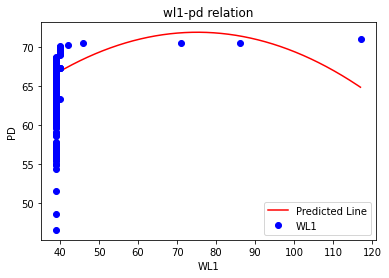

In [33]:
#plt.figure(figsize = (15, 5))

plt.plot(line_x, line_y, 'r-', label = 'Predicted Line')
plt.plot(x_test, y_test, 'bo', label = 'WL1')
plt.title('wl1-pd relation')
plt.xlabel('WL1')
plt.ylabel('PD')
plt.legend(loc = 'lower right')
plt.show()

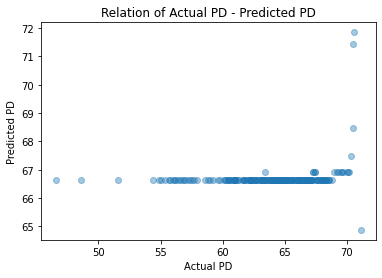

In [34]:
# 실제 담수심과 예상 담수심 간 관계.

y_hat = hypothesis = w1_pred * x_test * x_test + w2_pred * x_test + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [35]:
def rmse(x_test, y_test):
    y_hat = hypothesis = w1_pred * x_test * x_test + w2_pred * x_test + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

4.6804376
